In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection
from matplotlib import pylab as plt
from IPython import display

from ClassRNMulticlase import RNMulticlase

In [3]:
datos = pd.read_csv(DATOS_DIR + 'iris.csv')
datos.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = np.array(datos.iloc[:, 2:4])  # nos quedamos con petallength y petalwidth

T = np.array(datos['class'])
nomClases = datos['class'].value_counts()

# creating instance of one-hot-encoder
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
T = enc.fit_transform(T.reshape(-1,1)).toarray()
print(T[:5,:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
                                         X, T, test_size=0.70) #, random_state=42)

normalizarEntradas = True
if normalizarEntradas:
    normalizador = preprocessing.StandardScaler()
    X_train = normalizador.fit_transform(X_train)
    X_test = normalizador.transform(X_test)

In [6]:
rn = RNMulticlase(alpha=0.1, n_iter=400, cotaE=10e-10, FUN='softmax', COSTO='EC')
resul=rn.fit(X_train,T_train)
print("accuracy = ", rn.accuracy(X_train,T_train))

accuracy =  1.0


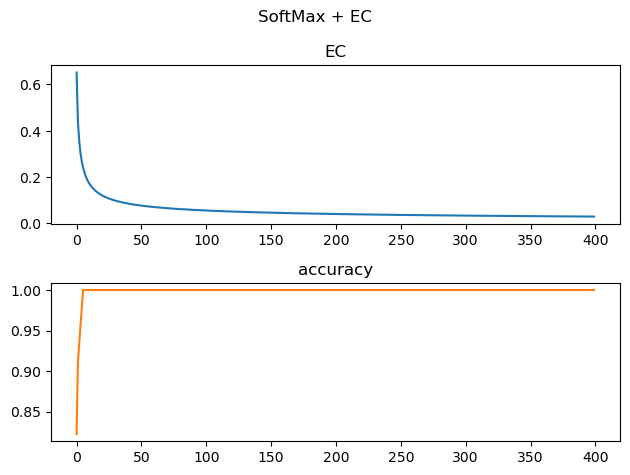

In [7]:
x = range(len(rn.errors_))    
fig, (ax1, ax2)= plt.subplots(2)
ax1.plot(x, rn.errors_)
ax1.set_title('EC')
ax2.plot(x, rn.accuracy_, 'tab:orange')
ax2.set_title('accuracy')
plt.suptitle('SoftMax + EC')
fig.tight_layout()

In [8]:
rn.accuracy(X_test, T_test)

0.9428571428571428

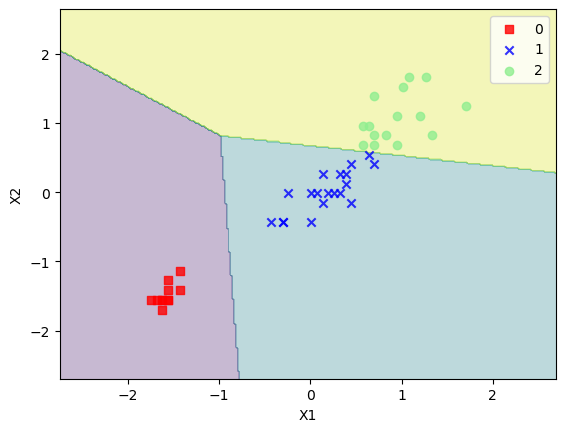

In [9]:
from PlotRegiones import plot_decision_regions
Y = np.argmax(T_train.T,axis=0)

plot_decision_regions(X_train, Y, classifier=rn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.show()

In [10]:
y_pred = rn.predict_nOut(X_test)

In [11]:
print(y_pred[0,:])

[9.98611002e-01 1.38899800e-03 2.63513687e-19]
